In [4]:
import cirq
import qtree
import matplotlib
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

ModuleNotFoundError("No module named 'tensorflow'")


# Example usage

In [5]:
def get_test_circ_filename(root, size, depth=10, id_=0):
    grid = f'{size}x{size}'
    return f'{root}/inst/cz_v2/{grid}/inst_{grid}_{depth}_{id_}.txt'

test_file = get_test_circ_filename('./qtree/test_circuits', 4)
test_file

'./qtree/test_circuits/inst/cz_v2/4x4/inst_4x4_10_0.txt'

## Read circuit and build graph

In [101]:
nqubits, circ = qtree.read_circuit_file(test_file)
for layer in circ:
    print(layer)

2020-02-24 20:21:29,685- INFO•	reading file ./qtree/test_circuits/inst/cz_v2/4x4/inst_4x4_10_0.txt
2020-02-24 20:21:29,687- INFO•	There are 16 qubits in circuit


[H(0), H(1), H(2), H(3), H(4), H(5), H(6), H(7), H(8), H(9), H(10), H(11), H(12), H(13), H(14), H(15)]
[cZ(0,1), cZ(6,7), cZ(8,9), cZ(14,15), T(2), T(3), T(4), T(5), T(10), T(11), T(12), T(13)]
[cZ(4,8), cZ(6,10), Y_1_2(0), Y_1_2(1), X_1_2(7), X_1_2(9), Y_1_2(14), X_1_2(15)]
[cZ(1,2), cZ(9,10), T(0), Y_1_2(4), X_1_2(6), T(7), X_1_2(8), T(14), T(15)]
[cZ(0,4), cZ(9,13), cZ(2,6), cZ(11,15), Y_1_2(1), T(8), Y_1_2(10)]
[cZ(2,3), cZ(4,5), cZ(10,11), cZ(12,13), Y_1_2(0), T(1), X_1_2(6), Y_1_2(9), Y_1_2(15)]
[cZ(5,9), cZ(7,11), T(0), X_1_2(2), Y_1_2(3), Y_1_2(4), T(6), Y_1_2(10), Y_1_2(12), X_1_2(13), T(15)]
[cZ(5,6), cZ(13,14), T(2), T(3), T(4), Y_1_2(7), Y_1_2(9), T(10), Y_1_2(11), T(12)]
[cZ(8,12), cZ(1,5), cZ(10,14), cZ(3,7), X_1_2(6), T(9), T(11), X_1_2(13)]
[cZ(0,1), cZ(6,7), cZ(8,9), cZ(14,15), X_1_2(3), Y_1_2(5), Y_1_2(10), Y_1_2(12), T(13)]
[H(0), H(1), H(2), H(3), H(4), H(5), H(6), H(7), H(8), H(9), H(10), H(11), H(12), H(13), H(14), H(15)]


2020-02-24 20:21:29,726- INFO•	Generated graph with 78 nodes and 115 edges
/usr/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


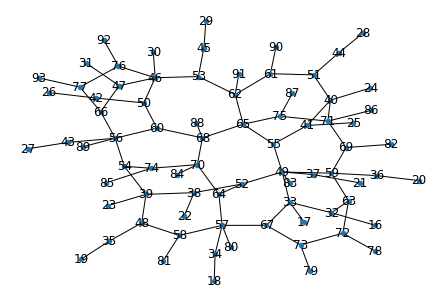

In [102]:
graph = qtree.graph_model.circ2graph(nqubits, circ)
nx.draw_kamada_kawai(graph, node_size=20, with_labels=True)

### Generate buckets

In [103]:
buckets, data_dict, bra, ket = \
    qtree.optimizer.circ2buckets(nqubits, circ)
print(bra, ket)

[o_0, o_1, o_2, o_3, o_4, o_5, o_6, o_7, o_8, o_9, o_10, o_11, o_12, o_13, o_14, o_15] [i_0, i_1, i_2, i_3, i_4, i_5, i_6, i_7, i_8, i_9, i_10, i_11, i_12, i_13, i_14, i_15]


### Get graph from buckets, make clique on output vars

In [104]:
graph_initial = qtree.graph_model.buckets2graph(
    buckets, ignore_variables=ket)

graph_full = qtree.graph_model.make_clique_on(graph_initial, bra)

2020-02-24 20:21:30,299- INFO•	Clique of size 16 on vertices: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)


<IPython.core.display.Javascript object>


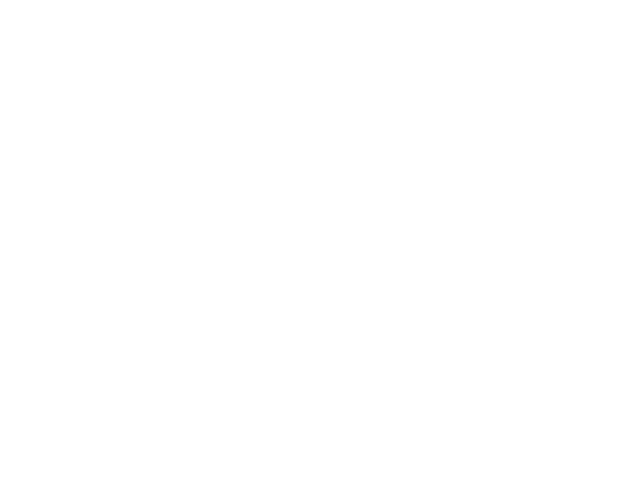

In [105]:
%matplotlib notebook 

def draw_graph(graph):
    layout = nx.kamada_kawai_layout(graph)
    nx.draw_networkx_nodes(graph, layout, node_size=5)
    nx.draw_networkx_edges(graph, layout)
    nx.draw_networkx_labels(graph, layout)
    
draw_graph(graph_full)

In [106]:
%matplotlib inline

### Get optimal peo with clique in the end

In [107]:

qtree.simulator.eval_contraction_cost(test_file)

2020-02-24 20:21:30,627- INFO•	reading file ./qtree/test_circuits/inst/cz_v2/4x4/inst_4x4_10_0.txt
2020-02-24 20:21:30,627- INFO•	There are 16 qubits in circuit
2020-02-24 20:21:30,767- INFO•	generating config file output/quickbb.47118013.cnf
2020-02-24 20:21:30,767- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.47118013.cnf 
2020-02-24 20:21:30,923- INFO•	Removed indices by parallelization:
[49, 46, 57, 56, 33]
2020-02-24 20:21:30,924- INFO•	Removed 5 variables
2020-02-24 20:21:30,930- INFO•	generating config file output/quickbb.20407522.cnf
2020-02-24 20:21:30,932- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.20407522.cnf 


treewidth 4
Memory (in doubles):
 raw: 3.706e+06
 optimized: 2.268e+04
 parallel:
  node: 1.709e+04 total: 5.468e+05 n_tasks: 32


In [108]:
peo, tw = qtree.graph_model.get_peo(graph_full)
new_peo = qtree.graph_model.get_equivalent_peo(graph_full, peo, bra)
print(tw, new_peo)

2020-02-24 20:21:31,122- INFO•	generating config file output/quickbb.75868809.cnf
2020-02-24 20:21:31,123- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.75868809.cnf 


16 [v_80, v_83, v_84, v_89, v_91, v_88, v_86, v_81, v_85, v_93, v_92, v_87, v_82, v_90, v_79, v_78, v_24, v_30, v_18, v_34, v_21, v_37, v_23, v_27, v_43, v_20, v_36, v_17, v_25, v_72, v_73, v_16, v_28, v_44, v_61, v_29, v_45, v_22, v_26, v_42, v_69, v_75, v_76, v_77, v_31, v_74, v_19, v_35, v_58, v_48, v_54, v_47, v_66, v_71, v_50, v_68, v_38, v_64, v_53, v_51, v_32, v_67, v_55, v_41, v_63, v_62, v_52, v_60, v_33, v_59, v_56, v_70, v_39, v_49, v_57, v_65, v_46, v_40, o_0, o_1, o_2, o_3, o_4, o_5, o_6, o_7, o_8, o_9, o_10, o_11, o_12, o_13, o_14, o_15]


## Cost estimation

In [109]:
def get_graph_from_file(test_file):
    nqubits, circ = qtree.read_circuit_file(test_file)
    graph = qtree.graph_model.circ2graph(nqubits, circ)

    ### Generate buckets
    buckets, data_dict, bra, ket = \
        qtree.optimizer.circ2buckets(nqubits, circ)

    ### Get graph from buckets, make clique on output vars

    graph_initial = qtree.graph_model.buckets2graph(
        buckets, ignore_variables=ket)

    graph_full = qtree.graph_model.make_clique_on(graph_initial, bra)

    ### Get optimal peo with clique in the end
    return graph_full

def generate_peo(graph_full):
    peo, tw = qtree.graph_model.get_peo(graph_full)
    new_peo = qtree.graph_model.get_equivalent_peo(graph_full, peo, bra)
    return new_peo, tw

def optimize_graph(graph_raw):
    peo, tw = generate_peo(graph_raw)
    #print(tw, 'peo:', peo)
    graph, label_dict = qtree.graph_model.relabel_graph_nodes(
        graph_raw, dict(zip(peo, sorted(graph_raw.nodes(), key=int)))
    )
    return graph

In [110]:
test_file = get_test_circ_filename('./qtree/test_circuits/', 6, 10)
qtree.simulator.eval_contraction_cost(test_file)

2020-02-24 20:21:31,288- INFO•	reading file ./qtree/test_circuits//inst/cz_v2/6x6/inst_6x6_10_0.txt
2020-02-24 20:21:31,288- INFO•	There are 36 qubits in circuit
2020-02-24 20:21:31,781- INFO•	generating config file output/quickbb.18916348.cnf
2020-02-24 20:21:31,783- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.18916348.cnf 


KeyboardInterrupt: 

In [112]:
def plot_cost(mems, flops):
    plt.yscale('log')
    ax = plt.gca()
    ax.grid(which='minor', alpha=0.5, linestyle='-', axis='both')
    ax.grid(which='major', alpha=0.6, axis='both')
    ax.yaxis.set_tick_params(labelbottom=True)
    ax.minorticks_on()
    
    plt.plot(mems, label='Memory')
    plt.plot(flops, label='FLOP')
    plt.legend()
    
def cost_graph(graph_full, title):
    mems, flops = qtree.graph_model.cost_estimator(graph_full)
    buckets = qtree.optimizer.graph2buckets(graph_full)
    plt.title(title)
    plot_cost(mems, flops)
    plt.plot([len(x) for x in buckets])
    print(title, '{:.3e}'.format(sum(flops)))

2020-02-24 20:21:43,003- INFO•	reading file ./qtree/test_circuits//inst/cz_v2/6x6/inst_6x6_10_0.txt
2020-02-24 20:21:43,004- INFO•	There are 36 qubits in circuit
2020-02-24 20:21:43,010- INFO•	Generated graph with 178 nodes and 264 edges
2020-02-24 20:21:43,040- INFO•	Clique of size 36 on vertices: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35)
2020-02-24 20:21:44,956- INFO•	generating config file output/quickbb.96769930.cnf
2020-02-24 20:21:44,958- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.96769930.cnf 


full state, naive 6.734e+15
full state, with equivalent peo 1.691e+13
one amplitude 8.775e+07


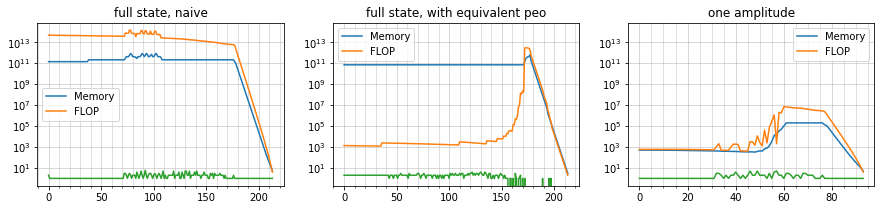

In [113]:
f, axs = plt.subplots(1,3, sharey=True, figsize=(15,3))
graph_full = get_graph_from_file(test_file)             

plt.sca(axs[0])
cost_graph(graph_full, 'full state, naive')
graph_full = optimize_graph(graph_full)

plt.sca(axs[1])
cost_graph(graph_full, 'full state, with equivalent peo')

plt.sca(axs[2])
cost_graph(graph_initial, 'one amplitude')

,198,91,199,68,200,52,201,42,202,85,...,25,26,29,17,28,35,27,24,22,23
198,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


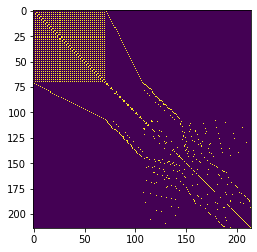

In [116]:
plt.imshow(nx.to_pandas_adjacency(graph_full))
(nx.to_pandas_adjacency(graph_full))

# QAOA usage

## Generate circuit

/usr/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


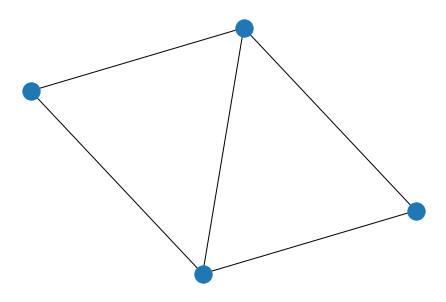

In [6]:
w = np.array([[0,1,1,0],[1,0,1,1],[1,1,0,1],[0,1,1,0]])
G = nx.from_numpy_matrix(w)
nx.draw(G)

In [10]:
def append_zz_term(qc, q1, q2, gamma):
    layer = []
    layer.append(qtree.operators.cX(q1, q2))
    layer.append(qtree.operators.ZPhase(q2, alpha=2*gamma))
    layer.append(qtree.operators.cX(q1, q2))
    qc.append(layer)

def get_cost_operator_circuit(G, gamma):
    N = G.number_of_nodes()
    qc = list()
    for i, j in G.edges():
        append_zz_term(qc, i, j, gamma)
    return qc

In [19]:
qc = get_cost_operator_circuit(G, np.pi/3)
cirq_qc = qtree.cirq.parse_circuit_1d(qc)
cirq_qc

0: ───@─────────────@───@─────────────@─────────────────────────────────────────────────────────
      │             │   │             │
1: ───X───Z^0.094───X───┼─────────────┼───@─────────────@───@─────────────@─────────────────────
                        │             │   │             │   │             │
2: ─────────────────────X───Z^0.094───X───X───Z^0.094───X───┼─────────────┼───@─────────────@───
                                                            │             │   │             │
3: ─────────────────────────────────────────────────────────X───Z^0.094───X───X───Z^0.094───X───

## Mixer operator

In [20]:
def append_x_term(qc, q1, beta):
    layer = []
    layer.append(qtree.operators.H(q1))
    layer.append(qtree.operators.ZPhase(q1, alpha=2*beta))
    layer.append(qtree.operators.H(q1))
    qc.append(layer)

def get_mixer_operator_circuit(G, beta):
    N = G.number_of_nodes()
    qc = []
    for n in G.nodes():
        append_x_term(qc, n, beta)
    return qc

In [21]:
qc = get_mixer_operator_circuit(G, np.pi/3)
qtree.cirq.parse_circuit_1d(qc)

0: ───H───Z^0.094───H───

1: ───H───Z^0.094───H───

2: ───H───Z^0.094───H───

3: ───H───Z^0.094───H───

## Full QAOA circuit

In [25]:
def layer_of_Hadamards(qc,N):
    layer = []
    for q in range(N):
        layer.append(qtree.operators.H(q))
    qc.append(layer)
        
def get_qaoa_circuit(G, beta, gamma):
    assert(len(beta) == len(gamma))
    p = len(beta) # infering number of QAOA steps from the parameters passed
    N = G.number_of_nodes()
    qc = []
    layer_of_Hadamards(qc, N)
    # second, apply p alternating operators
    for i in range(p):
        qc += get_cost_operator_circuit(G,gamma[i])
        qc += get_mixer_operator_circuit(G,beta[i])
    # finally, do not forget to measure the result!
    return qc

In [30]:
qc = get_qaoa_circuit(G, [np.pi/3], [np.pi/2])
cirq_qc = qtree.cirq.parse_circuit_1d(qc)
cirq_qc

0: ───H───@──────────────@───@──────────────@───H───Z^0.094────H───────────────────────────────────────────────────────────
          │              │   │              │
1: ───H───X───Z^(-6/7)───X───┼──────────────┼───@──────────────@───@──────────────@───H───Z^0.094────H─────────────────────
                             │              │   │              │   │              │
2: ───H──────────────────────X───Z^(-6/7)───X───X───Z^(-6/7)───X───┼──────────────┼───@──────────────@───H───Z^0.094───H───
                                                                   │              │   │              │
3: ───H────────────────────────────────────────────────────────────X───Z^(-6/7)───X───X───Z^(-6/7)───X───H───Z^0.094───H───

In [32]:
amplitudes, slice_dict = qtree.simulator.simulate_multiamp_np(G.number_of_nodes(), qc)

2020-02-26 19:38:12,694- INFO•	Clique of size 4 on vertices: (0, 1, 2, 3)
2020-02-26 19:38:12,697- INFO•	generating config file output/quickbb.66048764.cnf
2020-02-26 19:38:12,698- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.66048764.cnf 
2020-02-26 19:38:12.716 | INFO     | qtree.simulator:simulate_multiamp_np:386 - Initial peo: [v_20, v_7, v_6, v_5, v_4, v_25, v_23, v_19, v_27, v_28, v_29, v_26, v_8, v_10, v_12, v_14, v_22, v_24, v_18, v_21, v_9, v_15, v_16, v_17, o_1, v_11, v_13, o_3, o_2, o_0]
2020-02-26 19:38:12.730 | INFO     | qtree.simulator:simulate_multiamp_np:390 - Final peo: [v_26, v_5, v_12, v_6, v_10, v_4, v_14, v_25, v_27, v_24, v_23, v_28, v_22, v_19, v_29, v_18, v_7, v_8, v_9, v_16, v_17, v_20, v_21, v_15, v_11, v_13, o_0, o_1, o_2, o_3]
2020-02-26 19:38:12,747- DEBUG•	Eliminating 34 buckets
2020-02-26 19:38:12,749- DEBUG•	0:: bucket len 1
2020-02-26 19:38:12,750- DEBUG•	Got tensor with 1 indices E0(v_4)
2020-0

Evaluate subsets of amplitudes over qubits:
[0, 1, 2, 3]
Free variables in the resulting expression:
[o_0, o_1, o_2, o_3]
Summation idx: {4}, for [4, 27]; [4]
Summation idx: {5}, for [5, 31]; [5, 6]
Summation idx: {6}, for [6]; [6, 29]
Summation idx: {6}, for [6, 29]; [6, 31]
Summation idx: {7}, for [7, 32]; [7, 8]
Summation idx: {8}, for [8]; [8, 28]
Summation idx: {8}, for [8, 28]; [8, 32]
Summation idx: {9}, for [9, 30]; [9, 10]
Summation idx: {10}, for [10]; [10, 27]
Summation idx: {10}, for [10, 27]; [10, 30]
Summation idx: {11}, for [11, 13, 27]; [11, 12]
Summation idx: {12}, for [12]; [12, 13, 27]
Summation idx: {13}, for [13, 27, 29]; [13]
Summation idx: {27, 13}, for [13, 27, 29]; [13, 27]
Summation idx: {14}, for [14, 16, 27]; [14, 15]
Summation idx: {15}, for [15]; [15, 16, 27]
Summation idx: {16}, for [16, 26, 27]; [16]
Summation idx: {16, 27}, for [16, 26, 27]; [16, 27]
Summation idx: {17}, for [17, 19, 29]; [17, 18]
Summation idx: {18}, for [18]; [18, 19, 29]
Summation id

2020-02-26 19:38:12,894- DEBUG•	29:: bucket len 2
2020-02-26 19:38:12,896- DEBUG•	Got tensor with 4 indices E29(v_30,v_31,v_32,v_33)
2020-02-26 19:38:12,903- DEBUG•	Buckets eliminated


Summation idx: {29}, for [29, 31]; [29, 30, 32, 33]


In [33]:
amplitudes

array([ 0.20279368+0.11580212j, -0.00899499+0.21949964j,
        0.0563389 -0.26378812j,  0.08280684-0.25818791j,
        0.0563389 -0.26378812j,  0.08280684-0.25818791j,
       -0.18412841+0.14995563j, -0.00899499+0.21949964j,
       -0.00899499+0.21949964j, -0.18412841+0.14995563j,
        0.08280684-0.25818791j,  0.0563389 -0.26378812j,
        0.08280684-0.25818791j,  0.0563389 -0.26378812j,
       -0.00899499+0.21949964j,  0.20279368+0.11580212j])